In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pip install keras

# LTSM Prediction Model

In [ ]:
AAPL = pd.read_csv('/AAPL.csv')

In [ ]:
df= AAPL
df.head()

,date,volume,open,high,low,close,adjclose
0,2020-07-02,28484300,367.850006,370.470001,363.640015,364.109985,364.109985
1,2020-07-01,27684300,365.119995,367.359985,363.910004,364.109985,364.109985
2,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988
3,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999
4,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005


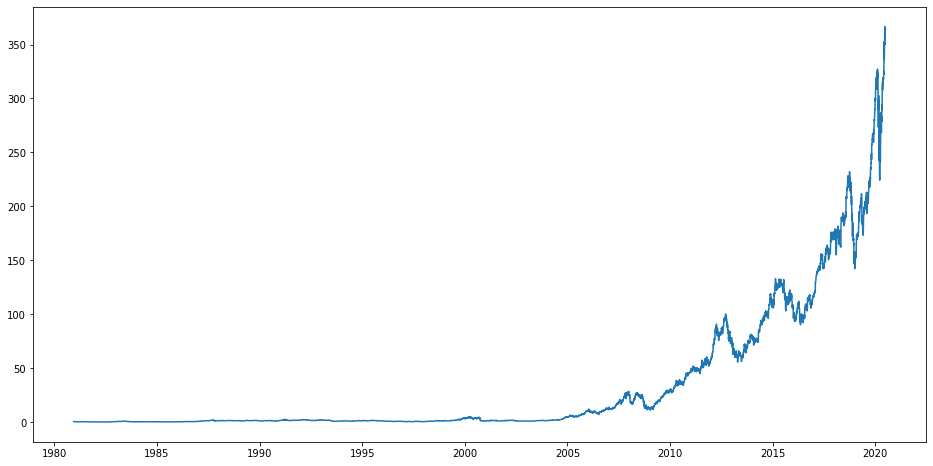

In [ ]:
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['date']
plt.figure(figsize=(16,8))
plt.plot(df["close"],label='Close Price history')

In [ ]:
df.shape

(9973, 7)

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','close'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:int(9973*.7),:]
valid_data=final_dataset[int(9973*.7):,:]

new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


6921/6921 - 175s - loss: 7.9656e-06 - 175s/epoch - 25ms/step


In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [ ]:
lstm_model.save("saved_model.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


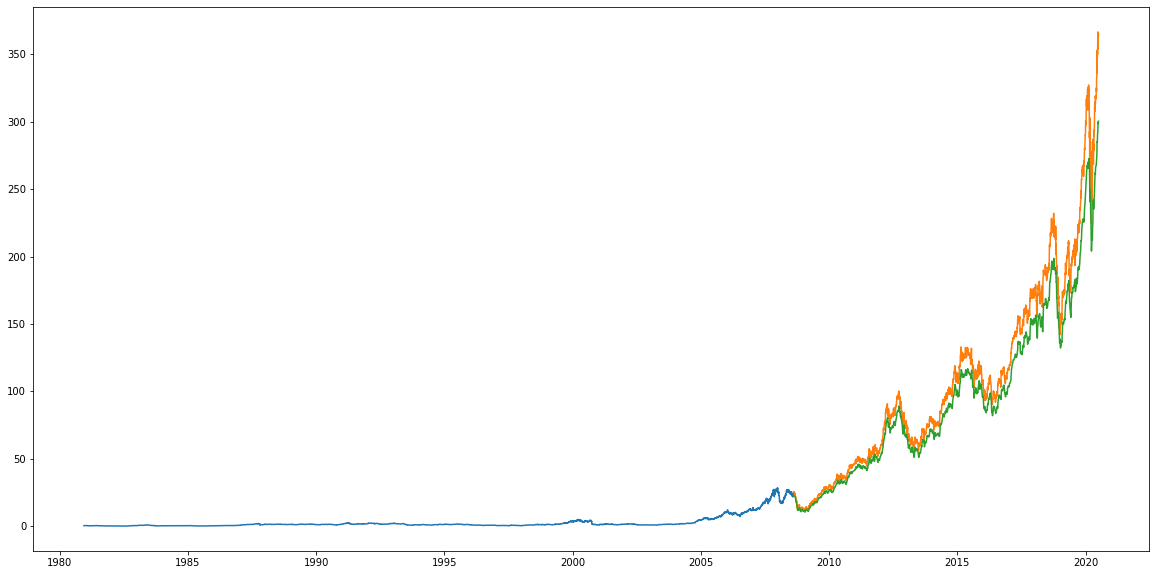

In [ ]:
train_data=new_dataset[:int(9973*.7)]
valid_data=new_dataset[int(9973*.7):]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["close"])
plt.plot(valid_data[['close',"Predictions"]])

In [ ]:
np.sqrt(np.mean((predicted_closing_price - np.array(new_dataset[int(9973*.7):]))**2))

17.408986161310416

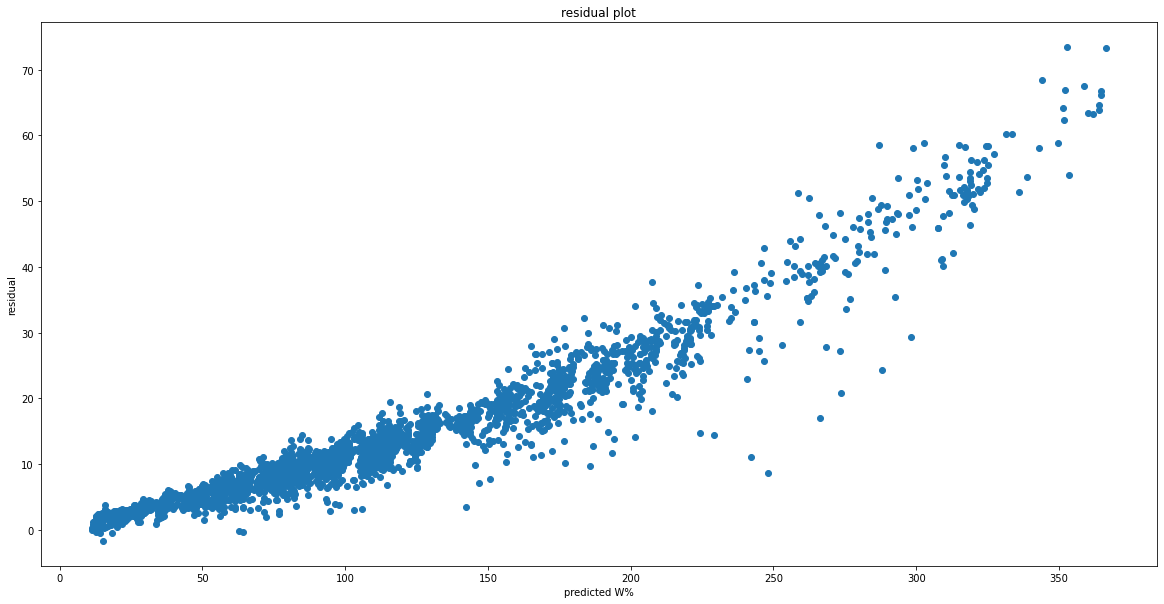

In [ ]:
residual = new_dataset[int(9973*.7):]['close'] - valid_data['Predictions']
plt.scatter(x=new_dataset[int(9973*.7):], y=residual)
plt.xlabel("predicted W%")
plt.ylabel("residual")
plt.title("residual plot");

DOING THIS AGAIN FOR DIfferent company

In [ ]:
MMM = pd.read_csv('/MMM.csv')

In [ ]:
df = MMM

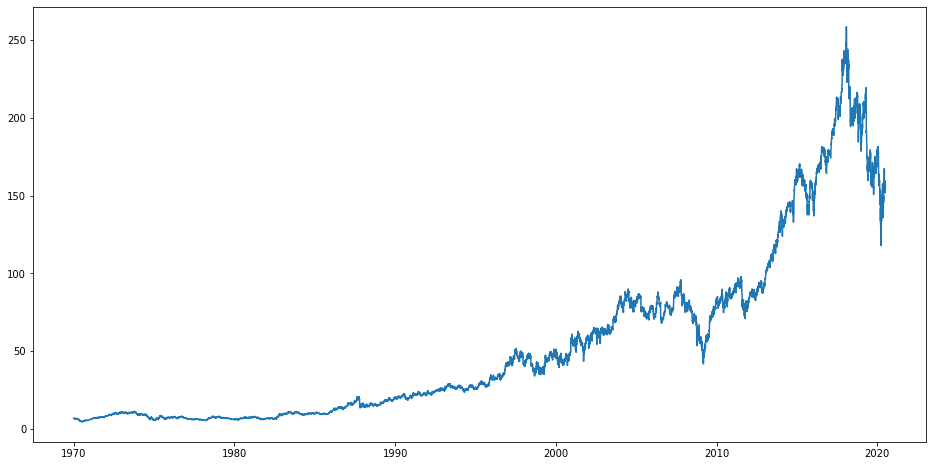

In [ ]:
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['date']
plt.figure(figsize=(16,8))
plt.plot(df["close"],label='Close Price history')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','close'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [ ]:
df.shape

(12740, 7)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:int(12740*.7),:]
valid_data=final_dataset[int(12740*.7):,:]

new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


8858/8858 - 224s - loss: 6.0687e-05 - 224s/epoch - 25ms/step


In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [ ]:
lstm_model.save("saved_model.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


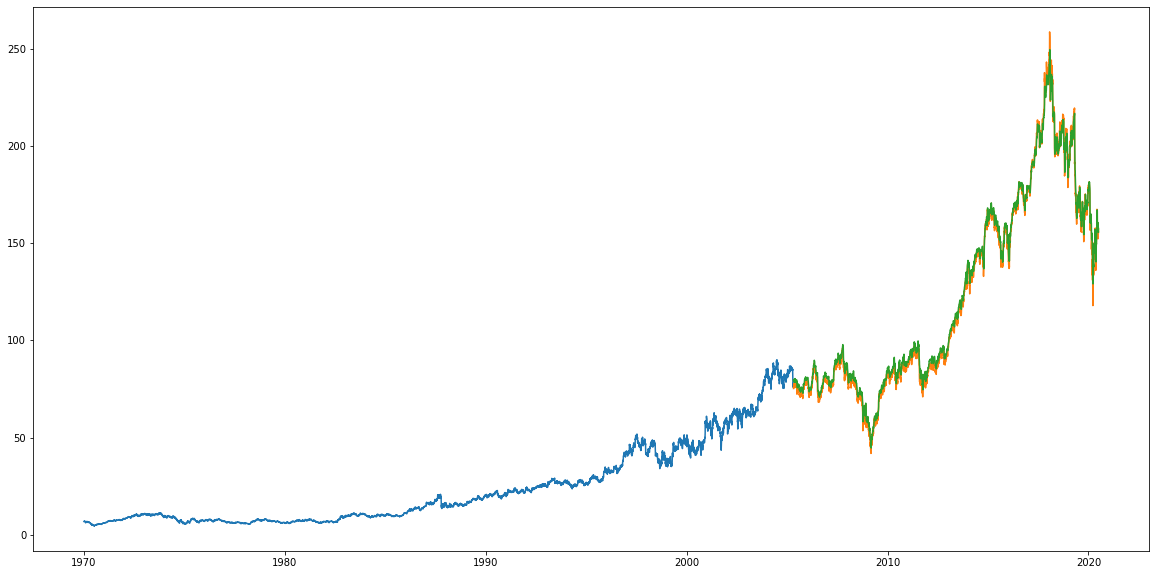

In [ ]:
train_data=new_dataset[:int(12740*.7)]
valid_data=new_dataset[int(12740*.7):]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["close"])
plt.plot(valid_data[['close',"Predictions"]])

In [ ]:
np.sqrt(np.mean((predicted_closing_price - np.array(new_dataset[int(12740*.7):]))**2))

2.9354702544565883

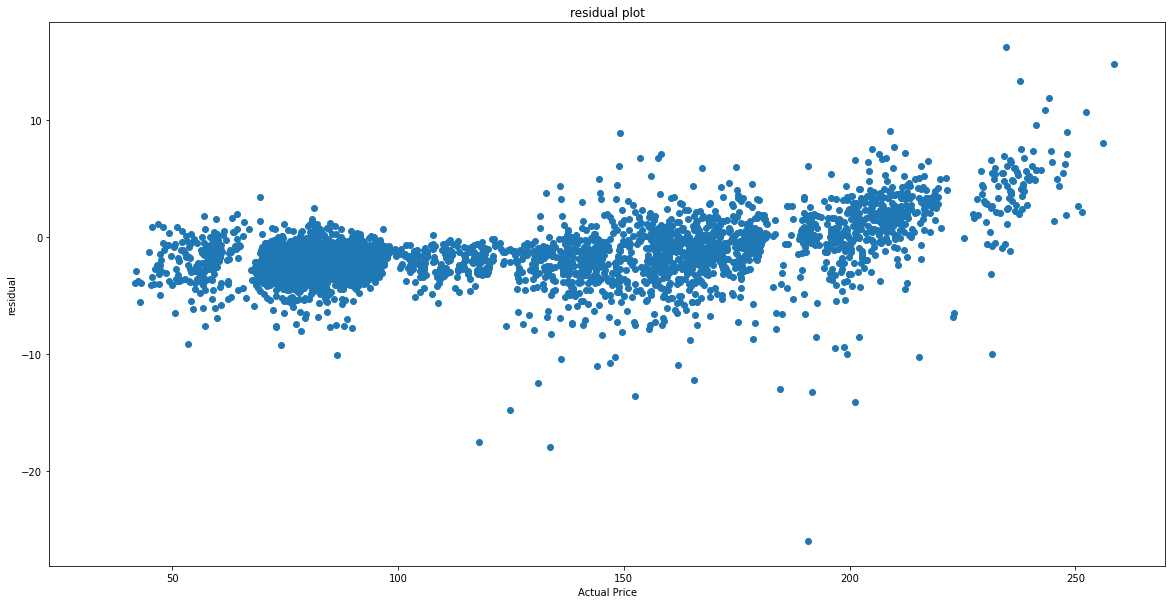

In [ ]:
residual = new_dataset[int(9973*.7):]['close'] - valid_data['Predictions']
plt.scatter(x=new_dataset[int(9973*.7):], y=residual)
plt.xlabel("Actual Price")
plt.ylabel("residual")
plt.title("residual plot");

In [ ]:
######################################################################################

In [ ]:
XOM = pd.read_csv('/XOM.csv')

In [ ]:
df = XOM

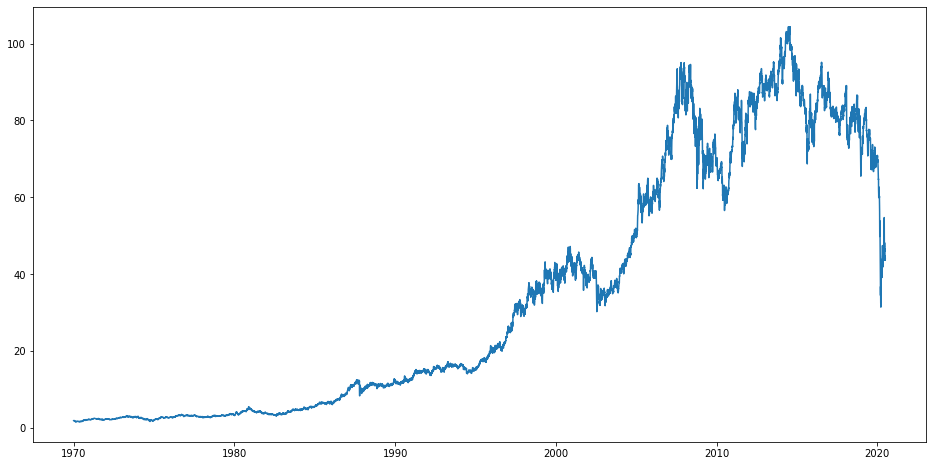

In [ ]:
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['date']
plt.figure(figsize=(16,8))
plt.plot(df["close"],label='Close Price history')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','close'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [ ]:
df.shape

(12740, 7)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:int(12740*.7),:]
valid_data=final_dataset[int(12740*.7):,:]

new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


8858/8858 - 223s - loss: 1.7135e-04 - 223s/epoch - 25ms/step


In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [ ]:
lstm_model.save("saved_model.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


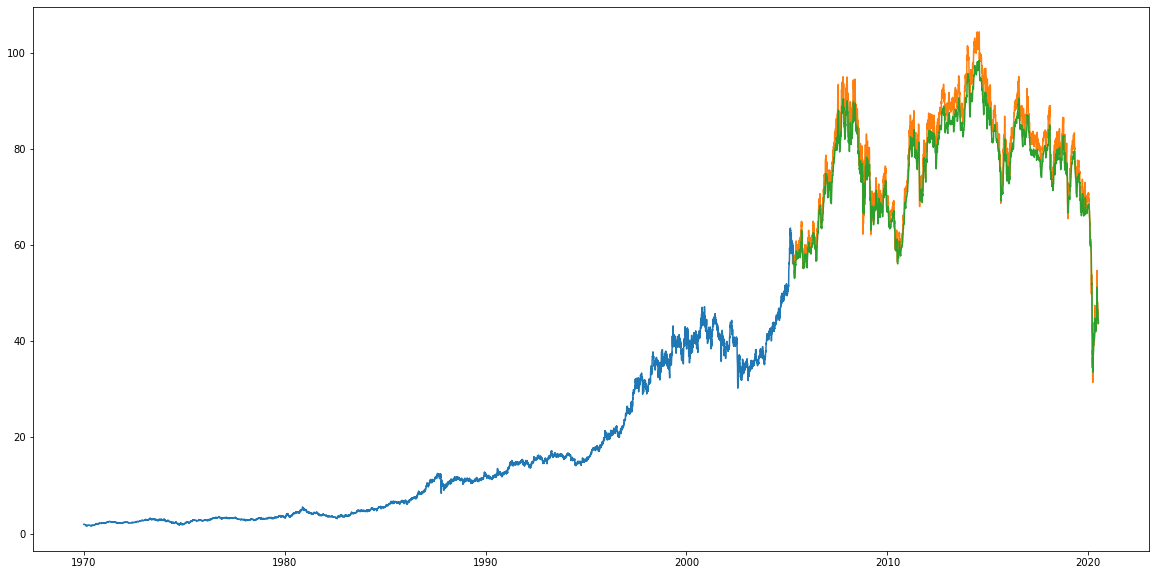

In [ ]:
train_data=new_dataset[:int(12740*.7)]
valid_data=new_dataset[int(12740*.7):]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["close"])
plt.plot(valid_data[['close',"Predictions"]])

In [ ]:
np.sqrt(np.mean((predicted_closing_price - np.array(new_dataset[int(12740*.7):]))**2))

3.0972701616244

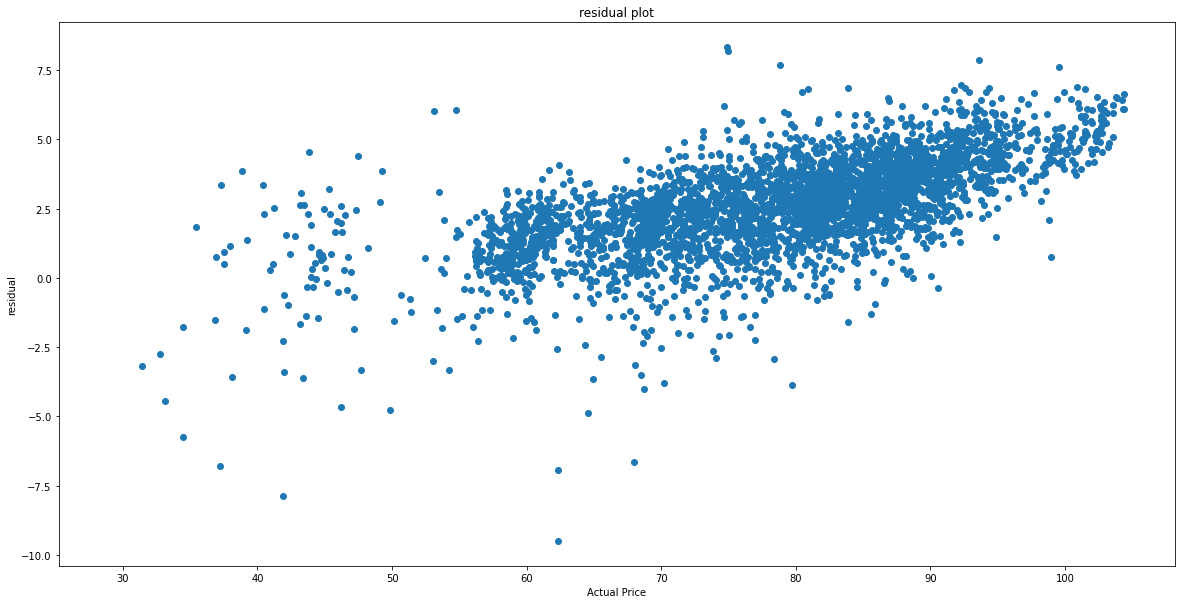

In [ ]:
residual = new_dataset[int(9973*.7):]['close'] - valid_data['Predictions']
plt.scatter(x=new_dataset[int(9973*.7):], y=residual)
plt.xlabel("Actual Price")
plt.ylabel("residual")
plt.title("residual plot");

# ARIMA Prediction Model

In [ ]:
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df = AAPL
df.head(5)

In [ ]:
plt.figure()
lag_plot(df['open'], lag=3)
plt.title('AAPL Stock - Autocorrelation plot with lag = 3')
plt.show()

In [ ]:
plt.plot(df["date"], df["close"])
#plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("AAPL stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['close'].values
test_data = test_data['close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error is 0.003701722871119734


In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
df['date'].min

<bound method Series.min of date
2020-07-02   2020-07-02
2020-07-01   2020-07-01
2020-06-30   2020-06-30
2020-06-29   2020-06-29
2020-06-26   2020-06-26
                ...    
1980-12-18   1980-12-18
1980-12-17   1980-12-17
1980-12-16   1980-12-16
1980-12-15   1980-12-15
1980-12-12   1980-12-12
Name: date, Length: 9973, dtype: datetime64[ns]>